# Research Question & Hypothesis

How much does a country spend on education as a percentage of their GDP? By using multiple datasets from the World Bank from 1990-2015, I investigate which model has the best performance in predicting high or low expenditure on education. I also look at what variables are important in determining expenditure on education. This is useful information for researchers to understand what factors makes a government spend more or less on education.

My null hypothesis is thus that my selected World Bank indicators have no predictive power on education expenditure.
My selected macro indicators are from different world bank datasets and I selected the ones that are seen as good predictors through the literature and believe might be interesting exploring.

# EDA

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import sklearn
import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

# Importing packages I that might be useful

/home/dsi-student/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be 

In [2]:
df1 = pd.read_csv('./atasets/WDI - Education.csv')
df1 = df1[['Country Name','Time','Country Code','Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]','All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]','Children out of school (% of primary school age) [SE.PRM.UNER.ZS]','Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]','Duration of compulsory education (years) [SE.COM.DURS]','Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]','Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]','Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS]','Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]','Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]','Gross enrollment ratio, primary, both sexes (%) [SE.PRM.ENRR]','Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]','Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]','Net enrolment rate, primary, both sexes (%) [SE.PRM.NENR]','Out-of-school children of primary school age, both sexes (number) [SE.PRM.UNER]','Percentage of enrolment in primary education in private institutions (%) [SE.PRM.PRIV.ZS]','Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]','School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]','Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]','Youth literacy rate, population 15-24 years, both sexes (%) [SE.ADT.1524.LT.ZS]']]
df2 = pd.read_csv('./atasets/WDI - Economics - National accounts.csv')
df2 = df2[['Country Name','Time','Country Code','Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]','Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD]','Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]','Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]','Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD]','Adjusted net savings, excluding particulate emission damage (% of GNI) [NY.ADJ.SVNX.GN.ZS]','Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]','Adjusted net savings, including particulate emission damage (% of GNI) [NY.ADJ.SVNG.GN.ZS]','Adjusted net savings, including particulate emission damage (current US$) [NY.ADJ.SVNG.CD]','Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]','Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]','Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD]','GDP (constant LCU) [NY.GDP.MKTP.KN]','GDP (current US$) [NY.GDP.MKTP.CD]','GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]','General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD]','GNI (constant 2010 US$) [NY.GNP.MKTP.KD]','GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]','Trade (% of GDP) [NE.TRD.GNFS.ZS]']]
# df3 = pd.read_csv('./atasets/WDI - Economics - Balance of payments.csv') not needed
# df4 = pd.read_csv('./atasets/WDI - Economics - Development assistance and PPP.csv')
df5 = pd.read_csv('./atasets/WDI - Economics - External debt.csv')
df5 = df5[['Country Name','Time','Country Code','Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]']]
df6 = pd.read_csv('./atasets/WDI - Environment.csv')
df6 = df6[['Country Name','Time','Country Code','Urban population (% of total) [SP.URB.TOTL.IN.ZS]']]
# df7 = pd.read_csv('./atasets/WDI - Finance.csv') not needed
df8 = pd.read_csv('./atasets/WDI - Health.csv')
df8 = df8[['Country Name','Time','Country Code','Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]','Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]','Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]','Life expectancy at birth, total (years) [SP.DYN.LE00.IN]','Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]','Population, total [SP.POP.TOTL]']]
df9 = pd.read_csv('./atasets/WDI - Infrastructure.csv')
df9 = df9[['Country Name','Time','Country Code','Scientific and technical journal articles [IP.JRN.ARTC.SC]']]
df10 = pd.read_csv('./atasets/WDI - Public sector and Conflict.csv')
df10 = df10[['Country Name','Time','Country Code','Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]']]
df11 = pd.read_csv('./atasets/WDI - Social and Labor.csv')
df11 = df11[['Country Name','Time','Country Code','Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]','International migrant stock (% of population) [SM.POP.TOTL.ZS]','Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]']]
# df12 = pd.read_csv('./atasets/WDI - Trade and Private sector.csv')

# Downloading different datasets from the World Bank. All the datasets have different topics. I then select the variables
# I think I might want to use from the different ones. Some datasets I decided were not useful for my research
# question and therefore commented out
# I can thus easily access them later if needed

/home/dsi-student/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_1 = df1.merge(df2, on=['Country Code', 'Time'], how='left')
df_1.head(3)

# Merging the first and second dataset on country code and time, then I look at the first three observations

,Country Name_x,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",...,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD],GDP (constant LCU) [NY.GDP.MKTP.KN],GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD],GNI (constant 2010 US$) [NY.GNP.MKTP.KD],GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD],Trade (% of GDP) [NE.TRD.GNFS.ZS]
0,Afghanistan,1990,AFG,NaN,NaN,NaN,NaN,NaN,NaN,622513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1990,ALB,NaN,NaN,NaN,NaN,NaN,NaN,278446.0,...,2.800000,5.879230e+07,NaN,3.613260e+11,2.101625e+09,1879.654764,NaN,NaN,NaN,38.065783
2,Algeria,1990,DZA,NaN,NaN,14.60961,NaN,NaN,NaN,4027612.0,...,4.946261,2.965535e+09,3.943033e+10,2.134980e+11,6.204510e+10,3551.128516,6.125649e+09,8.959417e+10,3457.583725,48.380714


In [4]:
df1.shape

# Checking the shape of df1 to make sure it matched df2 

(7133, 23)

In [5]:
df2.shape

# They have the same shape, so I'm good to go

(7133, 22)

In [6]:
df_2= df_1.merge(df8, on=['Country Code', 'Time'], how='left')
df_3= df_2.merge(df5, on=['Country Code', 'Time'], how='left')
df_4= df_3.merge(df6, on=['Country Code', 'Time'], how='left')
df_6= df_4.merge(df9, on=['Country Code', 'Time'], how='left')
df_7= df_6.merge(df10, on=['Country Code', 'Time'], how='left')
df= df_7.merge(df11, on=['Country Code', 'Time'], how='left')
df.head(5)

# Merging all the other datasets to my main dataset: df
# I then look at the first five observations of my final dataset

,Country Name_x,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",...,Country Name_x,Urban population (% of total) [SP.URB.TOTL.IN.ZS],Country Name_y,Scientific and technical journal articles [IP.JRN.ARTC.SC],Country Name_x,"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Country Name_y,"Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
0,Afghanistan,1990,AFG,NaN,NaN,NaN,NaN,NaN,NaN,622513.0,...,Afghanistan,18.316,NaN,NaN,NaN,NaN,Afghanistan,NaN,0.478025,NaN
1,Albania,1990,ALB,NaN,NaN,NaN,NaN,NaN,NaN,278446.0,...,Albania,36.428,NaN,NaN,NaN,NaN,Albania,NaN,2.011700,NaN
2,Algeria,1990,DZA,NaN,NaN,14.60961,NaN,NaN,NaN,4027612.0,...,Algeria,52.085,NaN,NaN,NaN,NaN,Algeria,NaN,1.057233,19.799999
3,American Samoa,1990,ASM,NaN,NaN,NaN,NaN,NaN,NaN,8574.0,...,American Samoa,80.948,NaN,NaN,NaN,NaN,American Samoa,NaN,45.240626,3.500000
4,Andorra,1990,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Andorra,94.712,NaN,NaN,NaN,NaN,Andorra,NaN,71.369081,NaN


In [7]:
df.shape

# The shape of my dataset

(13691, 62)

In [8]:
df.isnull().sum(axis=0)

# Looking for missing values
# There is a lot of them, that needs to be dealt with

Country Name_x                                                                                                            6563
Time                                                                                                                      6561
Country Code                                                                                                              6563
Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]                                               12838
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]       12564
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                                         9967
Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]                    12502
Duration of compulsory education (years) [SE.COM.DURS]                                                         

In [9]:
 def missing_values_0(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with zeros = ",  data.isnull().sum()
        ''' here you can replace it with the zeros'''
        data.fillna(0, inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"

# Creating a function that will replace missing values with zeros

In [10]:
 def missing_values_mean(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with mean = ",  data.isnull().sum()
        ''' here you can replace it with the zeros'''
        data = data.fillna(np.mean(data), inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"
        return data
# Creating a function that will replace missing values with the mean

In [11]:
df.drop(['Country Name_y', 'Country Name_x'
          ], axis=1, inplace=True) 

# Dropping variables that are not necessary, I will look at country code instead

In [12]:
df.isnull().sum(axis=0)

# Checking again for missing variables

Time                                                                                                                      6561
Country Code                                                                                                              6563
Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]                                               12838
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]       12564
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                                         9967
Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]                    12502
Duration of compulsory education (years) [SE.COM.DURS]                                                                   10232
Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.

In [13]:
df.dropna(thresh=42, inplace=True)

# There is a clear problem with missing values, I choose to manage this by dropping observations with 
# not having at least 42 values that are **not** NaN
# The number was selected to maintain enough observation to do my analysis and still be critical to observations 
# with too many missing values. 

# http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

In [14]:
missing_values_mean(df['Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]'])
missing_values_mean(df['All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]'])
missing_values_mean(df['Children out of school (% of primary school age) [SE.PRM.UNER.ZS]'])
missing_values_mean(df['Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]'])
missing_values_mean(df['Duration of compulsory education (years) [SE.COM.DURS]'])
missing_values_mean(df['Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]'])
missing_values_mean(df['Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]'])
missing_values_mean(df['Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS]'])
missing_values_mean(df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'])
missing_values_mean(df['Gross enrollment ratio, primary, both sexes (%) [SE.PRM.ENRR]'])
missing_values_mean(df['Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]'])
missing_values_mean(df['Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]'])
missing_values_mean(df['Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]'])
missing_values_mean(df['Net enrolment rate, primary, both sexes (%) [SE.PRM.NENR]'])
missing_values_mean(df['Out-of-school children of primary school age, both sexes (number) [SE.PRM.UNER]'])
missing_values_mean(df['Percentage of enrolment in primary education in private institutions (%) [SE.PRM.PRIV.ZS]'])
missing_values_mean(df['Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]'])
missing_values_mean(df['School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]'])
missing_values_mean(df['Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]'])
missing_values_mean(df['Youth literacy rate, population 15-24 years, both sexes (%) [SE.ADT.1524.LT.ZS]'])
missing_values_mean(df['Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]'])
missing_values_mean(df['Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD]'])
missing_values_mean(df['Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]'])
missing_values_mean(df['Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]'])
missing_values_mean(df['Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD]'])
missing_values_mean(df['Adjusted net savings, excluding particulate emission damage (% of GNI) [NY.ADJ.SVNX.GN.ZS]'])
missing_values_mean(df['Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]'])
missing_values_mean(df['Adjusted net savings, including particulate emission damage (% of GNI) [NY.ADJ.SVNG.GN.ZS]'])
missing_values_mean(df['Adjusted net savings, including particulate emission damage (current US$) [NY.ADJ.SVNG.CD]'])
missing_values_mean(df['Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'])
missing_values_mean(df['Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'])
missing_values_mean(df['Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD]'])
missing_values_mean(df['Urban population (% of total) [SP.URB.TOTL.IN.ZS]'])
missing_values_mean(df['GDP (constant LCU) [NY.GDP.MKTP.KN]'])
missing_values_mean(df['GDP (current US$) [NY.GDP.MKTP.CD]'])
missing_values_mean(df['GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]'])
missing_values_mean(df['General government final consumption expenditure (constant 2010 US$) [NE.CON.GOVT.KD]'])
missing_values_mean(df['GNI (constant 2010 US$) [NY.GNP.MKTP.KD]'])
missing_values_mean(df['GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]'])
missing_values_mean(df['Trade (% of GDP) [NE.TRD.GNFS.ZS]'])
missing_values_mean(df['Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]'])
missing_values_mean(df['International migrant stock (% of population) [SM.POP.TOTL.ZS]'])
missing_values_mean(df['Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]'])
missing_values_mean(df['Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]'])
missing_values_mean(df['Scientific and technical journal articles [IP.JRN.ARTC.SC]'])
missing_values_mean(df['Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]'])
missing_values_mean(df['Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]'])

# Replacing the rest of the missing values with the mean, which I assume is more correct than replacing with zeros
# There are clearly some variables with more missing values than others
# I assume replacing with the mean is more appropriate for these variables

Number of missing values replaced with mean =  750
Number of missing values replaced with mean =  457
Number of missing values replaced with mean =  95
Number of missing values replaced with mean =  425
Number of missing values replaced with mean =  84
Number of missing values replaced with mean =  743
Number of missing values replaced with mean =  4
Number of missing values replaced with mean =  167
Number of missing values replaced with mean =  150
Number of missing values replaced with mean =  10
Number of missing values replaced with mean =  301
Number of missing values replaced with mean =  750
Number of missing values replaced with mean =  750
Number of missing values replaced with mean =  94
Number of missing values replaced with mean =  95
Number of missing values replaced with mean =  78
Number of missing values replaced with mean =  179
Number of missing values replaced with mean =  23
Number of missing values replaced with mean =  322
Number of missing values replaced with m

In [15]:
df.isnull().sum(axis=0)

# Now, I have no missing values

Time                                                                                                                     0
Country Code                                                                                                             0
Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]                                               0
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]       0
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                                        0
Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]                    0
Duration of compulsory education (years) [SE.COM.DURS]                                                                   0
Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]    0
Enrolment in pri

In [16]:
df.drop(['GNI (constant 2010 US$) [NY.GNP.MKTP.KD]', 'GDP (current US$) [NY.GDP.MKTP.CD]', 'GDP (constant LCU) [NY.GDP.MKTP.KN]', 'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]', 'Expenditure on education as % of total government expenditure (%) [SE.XPD.TOTL.GB.ZS]', 'Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]','Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]','Adjusted net savings, including particulate emission damage (current US$) [NY.ADJ.SVNG.CD]','Adjusted net savings, excluding particulate emission damage (current US$) [NY.ADJ.SVNX.CD]','Adjusted net national income per capita (constant 2010 US$) [NY.ADJ.NNTY.PC.KD]','Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]','Adjusted net national income (constant 2010 US$) [NY.ADJ.NNTY.KD]','Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]','Percentage of enrolment in primary education in private institutions (%) [SE.PRM.PRIV.ZS]','Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]','Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]','Adjusted net savings, excluding particulate emission damage (% of GNI) [NY.ADJ.SVNX.GN.ZS]' 
          ], axis=1, inplace=True) 

# Dropping redundant variables that I don't want to include in my data analysis

In [17]:
df.drop(['Net enrolment rate, primary, both sexes (%) [SE.PRM.NENR]', 'Out-of-school children of primary school age, both sexes (number) [SE.PRM.UNER]','Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]','Gross enrollment ratio, primary, both sexes (%) [SE.PRM.ENRR]','GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]','Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]'
          ], axis=1, inplace=True) 

# Dropping other variables that are redudant to other variables in my dataframe

In [18]:
df.describe().T

# Describing the final dataset

,count,mean,std,min,25%,50%,75%,max
"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]",1112.0,8.284539e+01,1.039914e+01,1.545670e+01,8.284539e+01,8.284539e+01,8.284539e+01,9.989590e+01
"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",1112.0,7.427131e+01,8.807019e+00,0.000000e+00,7.299535e+01,7.427131e+01,7.619005e+01,1.000000e+02
Children out of school (% of primary school age) [SE.PRM.UNER.ZS],1112.0,7.320880e+00,9.591635e+00,6.500000e-04,1.525070e+00,4.170415e+00,7.705010e+00,6.094600e+01
Duration of compulsory education (years) [SE.COM.DURS],1112.0,9.606518e+00,1.788448e+00,5.000000e+00,9.000000e+00,9.000000e+00,1.100000e+01,1.500000e+01
"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]",1112.0,7.875493e+01,1.286844e+01,2.561130e+00,7.875493e+01,7.875493e+01,7.875493e+01,1.000000e+02
"Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",1112.0,1.206164e+07,5.577718e+07,2.224900e+04,4.300732e+05,1.355952e+06,4.340958e+06,6.972120e+08
"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",1112.0,4.642839e+00,1.342232e+00,1.139180e+00,3.802793e+00,4.642839e+00,5.411003e+00,9.632920e+00
"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]",1112.0,9.023112e+01,1.543763e+01,2.147605e+01,9.023112e+01,9.399186e+01,9.936422e+01,1.241050e+02
"School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]",1112.0,9.719621e-01,5.308980e-02,4.959900e-01,9.665675e-01,9.874500e-01,9.978300e-01,1.109960e+00
"Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]",1112.0,6.489536e+05,2.211599e+06,9.070000e+02,4.254075e+04,1.899185e+05,6.489536e+05,3.203589e+07


In [19]:
df.head(5)

# First five observations of the final dataset

,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]","Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]",...,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]","Population, total [SP.POP.TOTL]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Scientific and technical journal articles [IP.JRN.ARTC.SC],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
109,1990,IDN,81.519852,74.271315,3.71972,9.606518,78.754934,29933790.0,4.642839,93.327347,...,63.259902,62.2,181436821.0,9.107088,30.584,29567.227528,48.28295,18.677375,0.256625,8.223474
155,1990,MEX,87.556152,74.271315,2.94252,9.606518,78.754934,14493763.0,2.312090,86.662758,...,70.795732,37.1,85609404.0,4.461483,71.419,29567.227528,48.28295,18.677375,0.812614,8.223474
187,1990,PAN,88.779861,74.271315,13.38016,9.606518,78.754934,351021.0,4.642839,90.231123,...,73.046244,25.7,2471010.0,5.553105,53.903,29567.227528,48.28295,18.677375,2.539205,8.223474
191,1990,PHL,93.573898,74.271315,1.55735,9.606518,78.754934,10284861.0,4.642839,89.236198,...,65.288073,40.8,61947340.0,8.239725,48.590,29567.227528,48.28295,18.677375,0.248713,8.100000
243,1990,TUR,79.232452,74.271315,5.62141,9.606518,78.754934,6848083.0,4.642839,93.107147,...,64.282341,55.8,53994605.0,5.008882,59.203,29567.227528,48.28295,18.677375,2.155189,8.000000


In [20]:
df.corr().T

# Correlations between the variables
# Government expenditure on education, total (% of GDP) largest correlation is with GDP per capita and it's positive
# This makes sense in that countries with more GDP spread out over the population is more likely to invest 
# in its population through education expenditures

,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]","Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]",...,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]","Population, total [SP.POP.TOTL]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Scientific and technical journal articles [IP.JRN.ARTC.SC],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]"
"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]",1.000000,-0.005609,-0.468094,0.118027,0.300478,-0.075406,0.076863,0.518084,0.462472,-0.010498,...,0.379767,-0.472133,-0.051890,0.132505,0.342598,0.032517,0.010623,-0.258786,0.065254,0.125779
"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",-0.005609,1.000000,-0.000034,0.027785,-0.033455,0.019666,-0.076984,-0.017497,-0.066453,0.011887,...,-0.051433,0.070264,0.013556,-0.005951,-0.015148,-0.003606,0.083919,-0.001361,-0.018045,0.082765
Children out of school (% of primary school age) [SE.PRM.UNER.ZS],-0.468094,-0.000034,1.000000,-0.151230,-0.228573,0.072585,-0.206952,-0.762439,-0.607373,0.032172,...,-0.662491,0.738985,0.052406,-0.093466,-0.513337,-0.059694,-0.063562,0.286904,-0.123290,0.002047
Duration of compulsory education (years) [SE.COM.DURS],0.118027,0.027785,-0.151230,1.000000,0.042847,-0.060421,0.156176,0.239784,0.138285,-0.023398,...,0.358030,-0.311388,-0.046241,-0.007841,0.392229,0.043981,0.009588,-0.108405,0.107445,-0.033425
"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]",0.300478,-0.033455,-0.228573,0.042847,1.000000,-0.013108,0.177227,0.197948,0.193594,-0.000789,...,0.293985,-0.324636,-0.004143,0.079613,0.216880,0.070429,0.057829,-0.016212,0.085760,0.063686
"Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]",-0.075406,0.019666,0.072585,-0.060421,-0.013108,1.000000,-0.088898,-0.046847,-0.055670,0.950987,...,-0.090322,0.158887,0.992902,-0.060707,-0.129057,0.495749,0.034158,-0.023796,-0.168108,-0.075305
"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",0.076863,-0.076984,-0.206952,0.156176,0.177227,-0.088898,1.000000,0.226519,0.232041,-0.057234,...,0.225751,-0.308572,-0.078565,-0.018463,0.234706,0.030305,0.007416,-0.029072,0.136224,0.024001
"Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]",0.518084,-0.017497,-0.762439,0.239784,0.197948,-0.046847,0.226519,1.000000,0.638643,0.000404,...,0.654793,-0.755905,-0.026173,0.204352,0.547121,0.056267,0.043434,-0.289593,0.122267,0.052530
"School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]",0.462472,-0.066453,-0.607373,0.138285,0.193594,-0.055670,0.232041,0.638643,1.000000,-0.018715,...,0.477175,-0.630329,-0.042720,0.116414,0.366503,0.052705,0.001198,-0.225397,0.137571,0.091550
"Teachers in secondary education, both sexes (number) [SE.SEC.TCHR]",-0.010498,0.011887,0.032172,-0.02339

In [21]:
np.mean(df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'])

# Calculating the mean of Government expenditure on education, total (% of GDP) 

4.642839053352369

In [22]:
def binary(x):
    if x < 4.642839053352369:
        return 0
    else:
        return 1
    
df['expenditure_education_dummy'] = df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'].map(binary)

# Creating a binary dependent variable 
# It will be equal to zero if the percentage of GDP expenditure on education is below the mean
# It will be equal to one if the percentage of GDP expenditure on education is equal or above the mean
# This variable will be used for classification later in my analysis

In [23]:
df.sort('Country Code')

# Checking that I have a new column in my dataframe with either a zero or a one for each observation

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Time,Country Code,"Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS]","All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],Duration of compulsory education (years) [SE.COM.DURS],"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Enrolment in primary education, both sexes (number) [SE.PRM.ENRL]","Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]",...,"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]","Population, total [SP.POP.TOTL]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Urban population (% of total) [SP.URB.TOTL.IN.ZS],Scientific and technical journal articles [IP.JRN.ARTC.SC],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",International migrant stock (% of population) [SM.POP.TOTL.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]",expenditure_education_dummy
4753,2008,ALB,95.938637,74.271315,9.73271,8.000000,90.082960,1.994540e+05,4.642839,95.131241,...,16.0,2.947314e+06,1.565311,49.991000,5.150000e+01,48.282950,18.677375,5.793465,13.000000,1
5545,2011,ALB,96.845299,74.271315,6.77434,8.000000,94.431340,2.156600e+05,4.642839,98.047173,...,14.3,2.904780e+06,3.735022,53.247000,1.609000e+02,48.282950,18.677375,5.793465,14.000000,1
6073,2013,ALB,82.845394,74.271315,4.08740,9.000000,78.754934,1.988970e+05,3.538000,94.522743,...,13.3,2.896652e+06,4.314602,55.383000,1.836000e+02,70.358345,18.677375,5.793465,15.600000,0
2905,2001,ALB,98.712982,74.271315,5.67265,8.000000,88.019610,2.742330e+05,3.340600,96.880661,...,22.1,3.060173e+06,0.945481,42.435000,2.956723e+04,48.282950,18.677375,5.793465,22.700001,0
5809,2012,ALB,97.246971,74.271315,3.86291,9.000000,94.260020,2.066170e+05,4.642839,103.618843,...,13.8,2.900247e+06,4.417772,54.330000,1.865000e+02,48.282950,18.677375,5.793465,13.400000,1
5281,2010,ALB,82.845394,74.271315,8.96613,8.000000,78.754934,2.247810e+05,4.642839,92.844139,...,14.8,2.913021e+06,3.217212,52.163000,1.367000e+02,48.282950,5.500000,1.818957,14.200000,1
2648,2000,ARG,82.845394,74.271315,0.45153,10.000000,78.754934,4.900956e+06,4.580310,98.493736,...,18.0,3.705745e+07,8.982164,89.142000,2.956723e+04,48.282950,18.677375,4.156300,15.000000,0
3704,2004,ARG,82.845394,87.337372,0.80272,10.000000,78.754934,4.923075e+06,3.156540,98.562439,...,16.0,3.872878e+07,8.311325,89.899000,2.956723e+04,48.282950,12.900000,5.793465,12.600000,0
3968,2005,ARG,82.845394,88.430641,0.65417,10.000000,78.754934,4.872889e+06,3.474050,96.684792,...,15.3,3.914549e+07,5.261096,90.084000,2.956723e+04,48.282950,18.677375,4.274025,10.600000,0
6080,2013,ARG,82.845394,88.558990,0.64579,14.000000,78.754934,4.791544e+06,5.344100,100.877373,...,11.9,4.253830e+07,2.851286,91.452000,8.053100e+03,48.282950,18.677375,5.793465,6.600000,1


In [24]:
def dist_plotter(title, data, color):
    ''' here we set the canvas'''
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    
    '''here we set the components of the graph'''
    dist = sns.distplot(data, hist_kws={'alpha':0.6}, kde_kws={'linewidth':2}, color = color)
    
    '''here we define the mean and the components for the mean line'''
    dist.axvline(np.mean(data), lw=3, c='darkred', ls='--')
    average_roll = '{0:.2f}'.format(np.mean(data))
    
    '''here we add the title'''
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

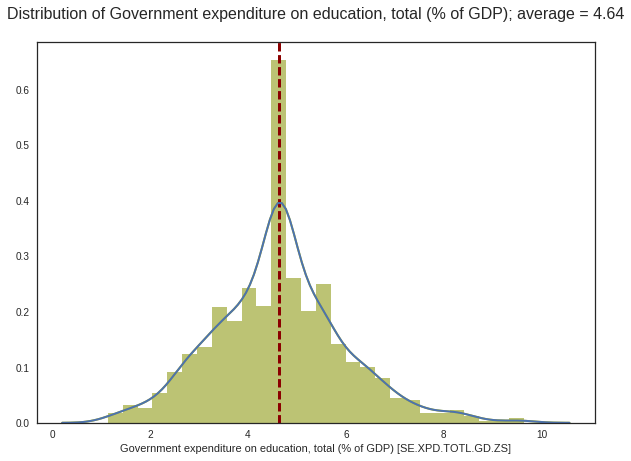

In [25]:
dist_plotter("Government expenditure on education, total (% of GDP)", df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], 'y')
plt.show()

# Using a function to look at the distribution of a variable with a line for the mean
# Looking at the main variable of interest
# Seem to be normally distributed with a mean around 4,6% of GDP spent on education
# http://localhost:8888/notebooks/lectures/feb_27_2017/CART_random_forest_demo.ipynb

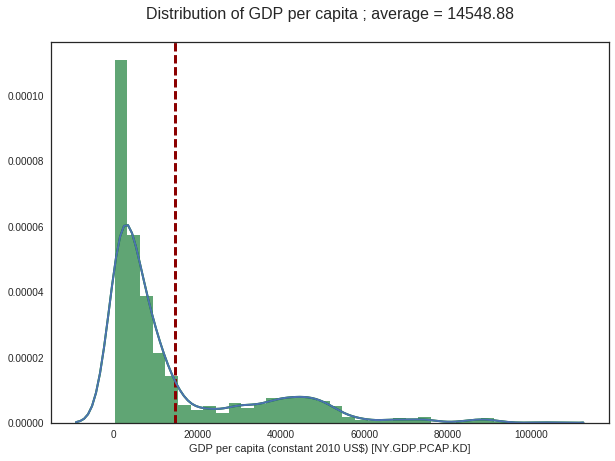

In [26]:
dist_plotter("GDP per capita ", df['GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]'], 'g')
plt.show()

# Distribution of GDP per capita with the average
# There is a lot variation, but looks like an accurate description of the world

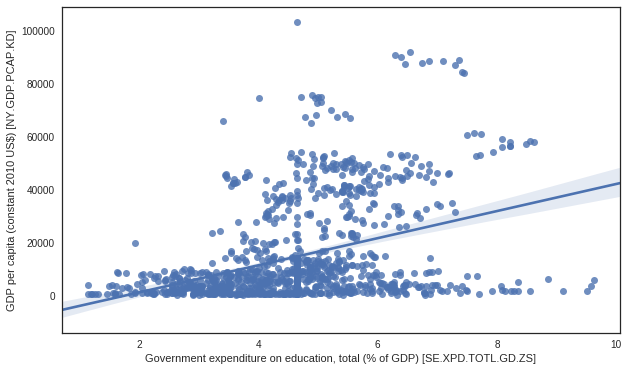

In [27]:
fig = plt.figure(figsize=(10,6))
sns.regplot(df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'], df['GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]'], data=df)
plt.show()

# Looks like there is a positive realtionship between government expenditure on education and GDP per capita
# GDP per capita will probably be an important variable in predicting government expenditures
# http://localhost:8888/notebooks/lab_solutions/Linear_Regression_LAB_solutions.ipynb

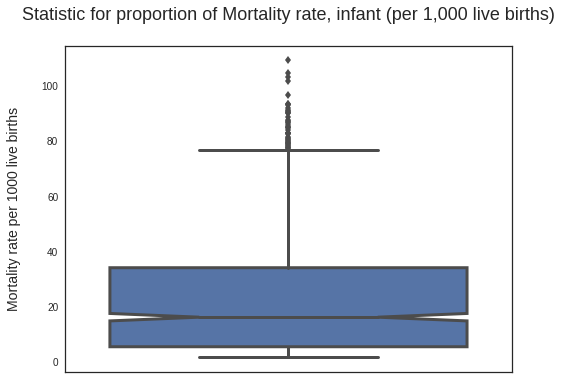

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
# Creating figure

sns.boxplot(df['Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]'], orient='v',
            fliersize=6, linewidth=3, notch=True, 
            saturation=0.8, ax=ax)
# Setting up boxplot using seaborn

ax.set_ylabel('Mortality rate per 1000 live births\n', fontsize=14)
ax.set_title('Statistic for proportion of Mortality rate, infant (per 1,000 live births)\n', fontsize=18)
# Setting title and label y-axis

plt.show()

# Proportion of mortality rate
# Most observations have low mortality rates are low, but there are some outliers

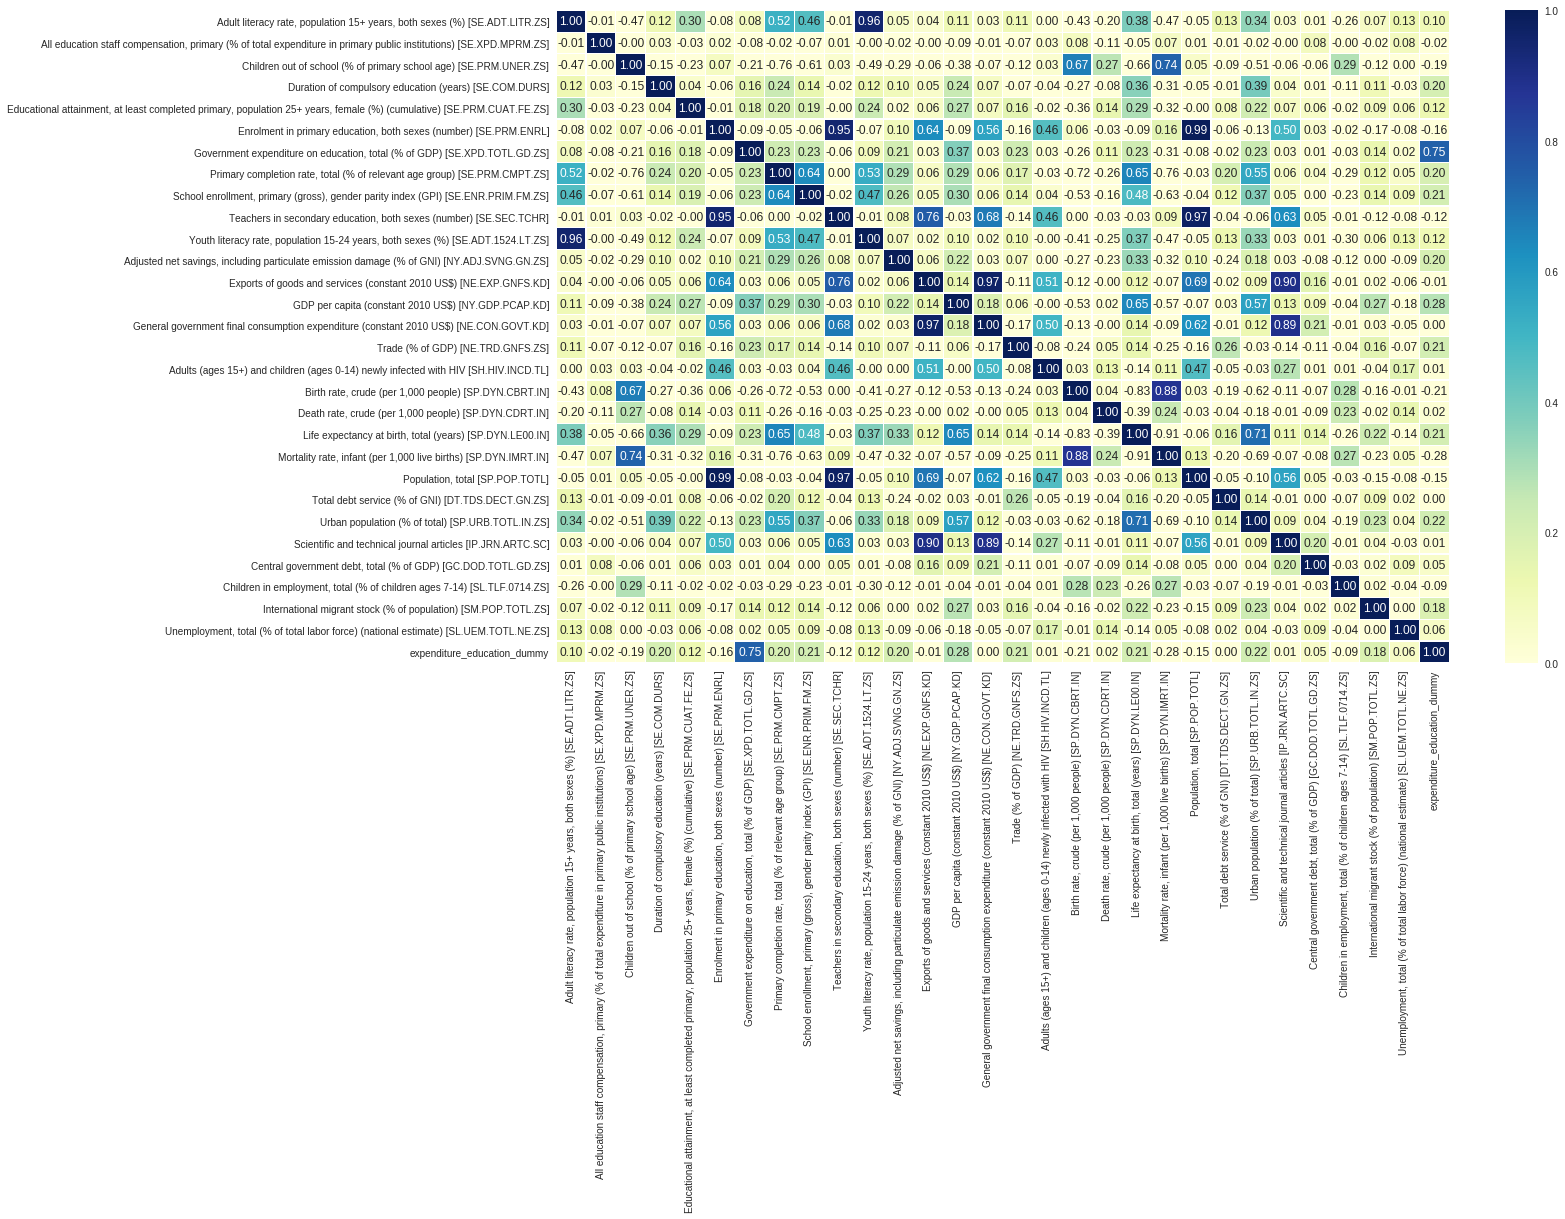

In [29]:
fig = plt.figure(figsize=(20,12))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, linewidths=.20, 
            annot_kws={'size': 12}, cmap="YlGnBu", vmin=0, vmax=1, fmt='.2f',ax=ax)
plt.show()

# Using seaborns heatmap to look at the correlation between selected variables from my summary statistics table
# There is a clear correlation between the number of people enrolled in primary education and total population
# Other variables are also highly correlated
# THe highest correlation for government expenditure on education is with GDP per capita
# http://localhost:8888/notebooks/exams/midterm/class_exam/MT_class_exam_SOLUTIONS.ipynb

# OLS

I want to see how different models are performing and then determine the most important indicators in determining education expenditures. 

I start with a linear OLS.

In [30]:
columns_ = df.columns.tolist()
exclude_cols = ['Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]','Country Code','Time','Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]','expenditure_education_dummy']

y = df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]']

X = df[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

# Creating my dependent variable and X variables by excluding the Y and other variables I choose not to look at

(1112,) (1112, 27)


In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
Xn = ss.fit_transform(X)

# Standarized my Xs

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

# Splitting my data into a train and test dataset
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

(778, 27) (334, 27)


(778,) (334,)


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Fitting my train data on a linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing packages

In [35]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

# Function to give the MSE and R^2
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [36]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

# Not to bad for an OLS, but R^2 is low

MSE OLS train data: 1.25, test data: 1.48
R^2 OLS train data: 0.30, test data: 0.20


In [37]:
model = lr.fit(X, y)

predictions = lr.predict(X)
predictions.shape

# Fitting my model
# Print the shape of predictions

(1112,)

In [38]:
print df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'].mean()
print predictions.mean()

# Predicting the mean

4.64283905335
4.64283905335


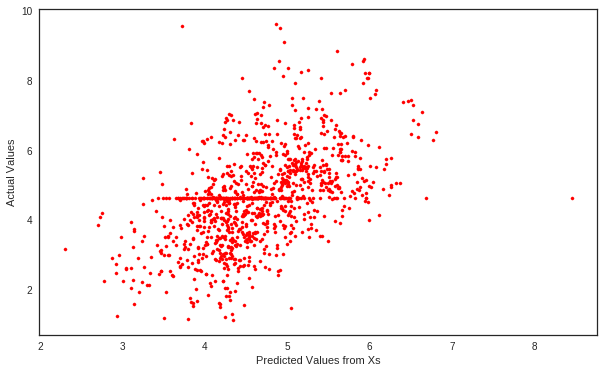

MSE: 1.30078983727


In [39]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=10, c='r', marker='o')
plt.xlabel("Predicted Values from Xs")
plt.ylabel("Actual Values")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

# Scatter plot of the predicted and actual values of y
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/Linear_Regression_LAB_solutions.ipynb

The OLS is doing an okay job, but the R² is only 0.3 for the train data and 0.2 for the test data. Other models should do better. The MSE is 1.25 for the train data and 1.48 for the test data, again not too bad, but other models will hopefully do better. 
It's important to see how well a regular OLS is performing to better understand the data and performance of other models.

# Ridge regression

Next I want to look at the performance of a Ridge regression.

In [40]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

# Importing packages

In [41]:
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

# Find the optimal alpha
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

11.497569954


In [42]:
# Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

# Fit the Ridge regression
ridge.fit(X_train, y_train)

# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

Ridge(alpha=11.497569953977356, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [43]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

# Evaluate the Ridge Regression
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Ridge train data: 1.25, test data: 1.47
R^2 Ridge train data: 0.30, test data: 0.20


THe ridge regression is performing equally as the OLS regression. R^2 is the same and the MSE is only 0.01 lower for the test data compared to the OLS. 
It's performing almost no better than the OLS. 

# Lasso regression

Next I want to look at the performance of a Lasso regression.


In [44]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

# Find the optimal alpha
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00470883726922


..............................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished


In [45]:
# Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit my regression
lasso.fit(X_train, y_train)

# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

Lasso(alpha=0.0047088372692197025, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

# Evaluate the Lasso Regression
# Similar, but slightly better than the OLS
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Lasso train data: 1.25, test data: 1.47
R^2 Lasso train data: 0.30, test data: 0.21


Again, the Lasso regression is performing about the same. 
The R^² is 0.01 higher for the test data compared to the Ridge regression, which means the lasso regression is performing slightly better. The MSE is the same for both models.

# Elastic Net Regression

Now I want to look at the performance of a Elastic Net regression.

In [47]:
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

# Find the optimal alphas
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0165204046439
0.39387755102


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.1min finished


In [48]:
#  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

# Fitting my model
enet.fit(X_train, y_train)
 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

ElasticNet(alpha=0.016520404643890201, copy_X=True, fit_intercept=True,
      l1_ratio=0.39387755102040817, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

# Evaluate the Elastic Net Regression
# Again, similar to OLS, I think other models will do better
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Elastic Net train data: 1.26, test data: 1.47
R^2 Elastic Net train data: 0.29, test data: 0.20


The Elastic Net regression is perfrming slightly worse (almost the same) as the lasso regression. 
The lasso is thus the best model so far.

In [50]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    return method_coefs.head(10)

# defining a function to print the coefficients, their absolute values and the non-absolute values

# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [51]:
best_reg_method(X, lasso)

# Looking at the coefficient values

,abs_coef,coef,variable
18,0.678206,-0.678206,"Mortality rate, infant (per 1,000 live births)..."
17,0.580902,-0.580902,"Life expectancy at birth, total (years) [SP.DY..."
12,0.435040,0.435040,GDP per capita (constant 2010 US$) [NY.GDP.PCA...
0,0.294890,-0.294890,"Adult literacy rate, population 15+ years, bot..."
10,0.217712,0.217712,"Adjusted net savings, including particulate em..."
14,0.206604,0.206604,Trade (% of GDP) [NE.TRD.GNFS.ZS]
9,0.193284,0.193284,"Youth literacy rate, population 15-24 years, b..."
15,0.192746,0.192746,"Birth rate, crude (per 1,000 people) [SP.DYN.C..."
6,0.183136,0.183136,"Primary completion rate, total (% of relevant ..."
3,0.154590,0.154590,Duration of compulsory education (years) [SE.C...


The highest (most important) coefficient in the lasso regression is the mortality rate, which is affecting expenditure on education negativly. This makes sense in that higher mortality rates leads to lower returns in investing in education. It's the same story for life expectancy. Higer GDP per capita is affecting expenditures on education positivly. 

# Creating graphs with residuals from the different models

Next I look at the residuals of these models to gain a better understanding of the models

In [52]:
# residuals on training data:
ols_resd_train  = y_train - lr.predict(X_train)
ridge_resd_train = y_train - ridge.predict(X_train)
lasso_resd_train = y_train - lasso.predict(X_train)
enet_resd_train = y_train - enet.predict(X_train)

# residuals on test data:
ols_resd_test  = y_test - lr.predict(X_test)
ridge_resd_test = y_test - ridge.predict(X_test)
lasso_resd_test = y_test - lasso.predict(X_test)
enet_resd_test = y_test - enet.predict(X_test)

# http://localhost:8888/notebooks/exams/midterm/class_exam/MT_class_exam_SOLUTIONS.ipynb

In [53]:
def plotter_graph(OLS_resd, Ridge_resd, Lasso_resd, Enet_resd):
    fig, axarr = plt.subplots(1, 4, figsize=(18, 6))
    sns.distplot(OLS_resd, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')
    sns.distplot(Ridge_resd, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')
    sns.distplot(Lasso_resd, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')
    sns.distplot(Enet_resd, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')
    plt.show()

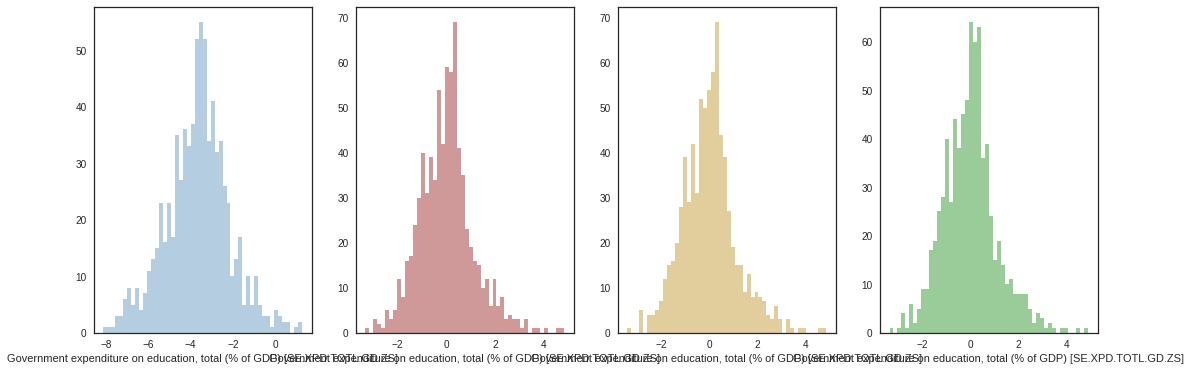

In [54]:
plotter_graph(ols_resd_train, ridge_resd_train, lasso_resd_train, enet_resd_train)

# Looking at the residuals for the different models on the train data
# http://localhost:8888/notebooks/exams/midterm/class_exam/MT_class_exam_SOLUTIONS.ipynb

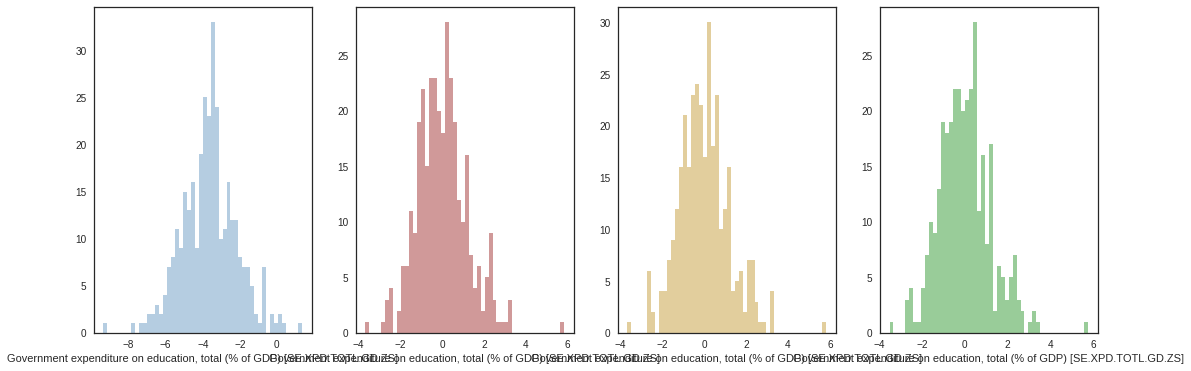

In [55]:
plotter_graph(ols_resd_test, ridge_resd_test, lasso_resd_test, enet_resd_test)

# Looking at the residuals for the different models on the test data
# http://localhost:8888/notebooks/exams/midterm/class_exam/MT_class_exam_SOLUTIONS.ipynb

# Decision Tree

Now let's compare the performance of the previous models to a decision tree.

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# Crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [57]:
dtr_gs.fit(X_train, y_train)

# Fit the regresion tree

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [58]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

# Print Best Estimator, parameters and score
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

best estimator DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3}


best score 0.433316300767


In [59]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

# Print the features that best explain my Y 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [60]:
feature_importance(X, dtr_best)

# The importance of these variables has changed a little bit from previous models, but is pretty consistent.
# Mortality rate is still the most important variable, but the other top 5 has changed order.
# Enrolment in primary and urban population is now second and third.

,feature,importance
18,"Mortality rate, infant (per 1,000 live births)...",0.180346
5,"Enrolment in primary education, both sexes (nu...",0.101979
21,Urban population (% of total) [SP.URB.TOTL.IN.ZS],0.087922
14,Trade (% of GDP) [NE.TRD.GNFS.ZS],0.082865
19,"Population, total [SP.POP.TOTL]",0.068912
23,"Central government debt, total (% of GDP) [GC....",0.059621
10,"Adjusted net savings, including particulate em...",0.057009
3,Duration of compulsory education (years) [SE.C...,0.052228
26,"Unemployment, total (% of total labor force) (...",0.051048
17,"Life expectancy at birth, total (years) [SP.DY...",0.041853


In [61]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

# Predict 

array([ 4.65470592,  3.65620599,  3.37532597,  5.24741554,  4.22502009,
        4.58920927,  6.41289196,  4.13495519,  4.69962813,  6.07669747,
        5.06416332,  5.94994656,  3.79489837,  4.96875642,  5.33058818,
        4.84233227,  4.69962813,  5.10276667,  4.61590395,  5.52324654,
        4.69962813,  4.17308197,  4.65470592,  4.96875642,  3.38732219,
        4.17308197,  5.06416332,  2.47209495,  4.14757012,  5.33076652,
        5.5050234 ,  4.29469311,  4.13495519,  2.21289333,  6.07669747,
        4.22502009,  5.01459876,  4.13495519,  5.06416332,  3.38732219,
        5.24741554,  1.9370175 ,  5.24741554,  5.9273634 ,  3.19058665,
        4.53871446,  5.50716674,  5.24741554,  3.37524431,  5.01459876,
        3.04653144,  2.47753167,  4.17308197,  6.41289196,  5.35780969,
        6.73543251,  3.84199756,  6.62639198,  1.9370175 ,  5.06416332,
        3.38732219,  4.53871446,  3.65620599,  7.2711134 ,  4.55125999,
        5.1147193 ,  7.94266224,  4.55125999,  5.94994656,  5.33

In [62]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

# Evaluate the Regression Tree performance on my train and test data
# The Regression tree is doing significantly better, especially on the train data
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Regression tree train data: 0.21, test data: 1.09
R^2 Regression tree train data: 0.88, test data: 0.41


The desicion tree is performing a lot better than the previous models, especially on the train data. 
The R^2 is 0.88 for the train data and the test data has a R² of 0.41. 
There is a bigger difference between the test and train data, which is likely due to overfitting. This is problematic and we hope that other models will do better 
We can also see that the MSE is lower, especially for the train data. 
This is still the best performing model so far, despite the overfitting.

# Random Forest Regression tree 

Next I want to compare the performance of the decision tree to a random forest regression tree

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [64]:
estimator_rfr.fit(X_train, y_train)

# Fit my random forest tree

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [65]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

# Print the best estimator, parameters and score
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 4}


best score 0.337165953647


In [66]:
feature_importance(X, rfr_best)

# Print the feature importance
# Similar, but a little different from the decision tree
# Results are thus consistent

,feature,importance
18,"Mortality rate, infant (per 1,000 live births)...",0.199485
12,GDP per capita (constant 2010 US$) [NY.GDP.PCA...,0.171045
5,"Enrolment in primary education, both sexes (nu...",0.089825
19,"Population, total [SP.POP.TOTL]",0.083803
14,Trade (% of GDP) [NE.TRD.GNFS.ZS],0.078328
10,"Adjusted net savings, including particulate em...",0.075720
21,Urban population (% of total) [SP.URB.TOTL.IN.ZS],0.047828
23,"Central government debt, total (% of GDP) [GC....",0.035303
17,"Life expectancy at birth, total (years) [SP.DY...",0.029677
7,"School enrollment, primary (gross), gender par...",0.027961


In [67]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

# Predict

array([ 4.16328342,  4.84099931,  4.61351307,  5.60259926,  4.86375539,
        4.23361486,  5.6712787 ,  4.54187095,  5.01423551,  5.74561167,
        4.18104917,  4.26582285,  3.86004258,  5.0298784 ,  4.84843187,
        4.96526777,  5.00167875,  4.70728341,  5.52953289,  4.37407437,
        5.09751579,  4.37112435,  4.48000753,  5.0296407 ,  4.29999047,
        4.22262601,  4.61076402,  4.07627226,  3.95472128,  4.98183318,
        4.78473839,  5.49484652,  4.39313718,  4.22227256,  5.74895928,
        4.86375539,  4.46601388,  4.28625399,  4.14522429,  4.08125563,
        5.56238556,  4.16409072,  5.94310471,  4.96219127,  3.5662602 ,
        5.0190557 ,  4.91015016,  5.549092  ,  4.41513055,  4.09673147,
        3.50768548,  3.98195051,  4.2864315 ,  6.07202011,  4.48423703,
        4.95916742,  4.94008097,  4.77047995,  4.55535509,  4.21693762,
        3.99623399,  5.07326716,  4.92040484,  6.05451487,  4.4401858 ,
        4.9126508 ,  6.36857658,  4.65455052,  4.0484343 ,  5.00

In [68]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

# Evaluate the model
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Random Forest Regression tree train data: 0.97, test data: 1.26
R^2 Random Forest Regression tree train data: 0.45, test data: 0.32


The decision tree is probably overfitting and therefore performing worse than the random forest.

The R^2 is particularly lower and higher MSE for the train data compared to the desicion tree, but they are closer to the predictions on the test data set. This tels us that this model is performing better in predicting. 
The test and train data are more compatible for the random forest, and is therefore the best performing model. 

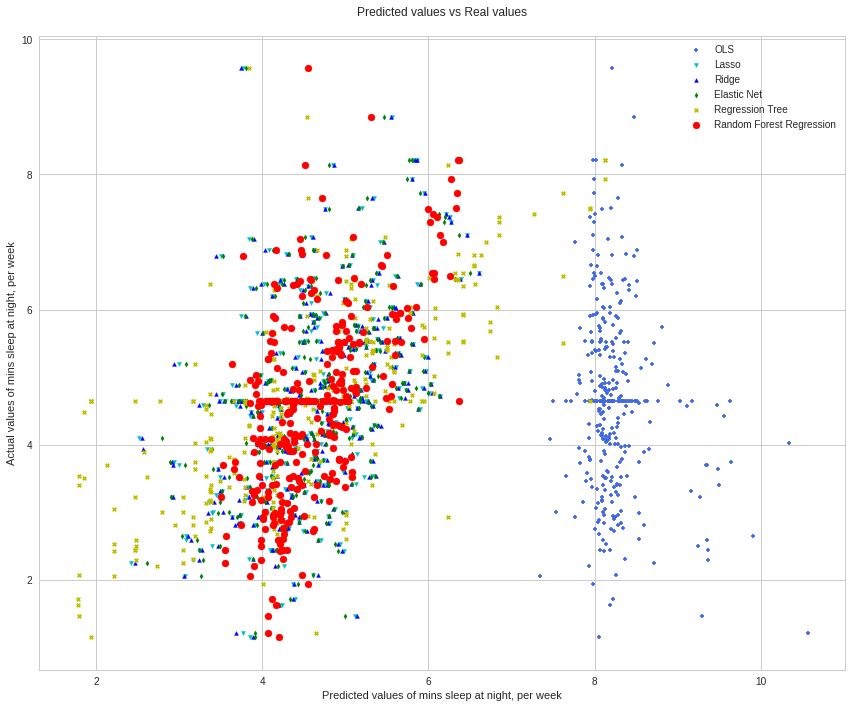

In [69]:
# http://localhost:8888/notebooks/exams/midterm/class_exam/MT_class_exam_SOLUTIONS.ipynb

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(12,10))
    plt.scatter(lr.predict(X_test), y_test, s=20, c='royalblue', marker='+', label="OLS")
    plt.scatter(lasso.predict(X_test), y_test, color='c', s=18, marker='v', label='Lasso')
    plt.scatter(ridge.predict(X_test), y_test, color='b', s=16, marker="^", label='Ridge')
    plt.scatter(enet.predict(X_test), y_test, color='g', s=14, marker="d", label='Elastic Net')
    plt.scatter(dtr_gs.predict(X_test), y_test, color='y', s=13, marker="x", label='Regression Tree' )
    plt.scatter(estimator_rfr.predict(X_test), y_test, color='r', marker='o', label='Random Forest Regression')
    
    plt.title('Predicted values vs Real values\n')
    plt.xlabel("Predicted values of mins sleep at night, per week")
    plt.ylabel("Actual values of mins sleep at night, per week")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
  


# Predicting which class with a Logistic Regression

Next, let's look the performance of a logistic regression to predict on the dummy variable on having high or low expenditure on education. Recall a zero means less than the mean and a one means equal to or higher than the mean.

In [70]:
columns_ = df.columns.tolist()
exclude_cols = ['Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]','Country Code','Time','Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]','expenditure_education_dummy']

y = df['expenditure_education_dummy']

X = df[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

# Creating my dependent variable and X variables by excluding the Y and other variables 
# I choose not to look at for the logistic regression

(1112,) (1112, 27)


In [71]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
Xn = ss.fit_transform(X)

# Standarized my Xs

In [72]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

# Splitting my data into a train and test dataset

(778, 27) (778,)
(334, 27) (334,)


In [73]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [74]:
estimator.fit(X_train,y_train)

# Fitting it on my train data

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [75]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best
print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
print "\nBest Params on hold out data (train):\n", estimator.best_params_
print "\nBest Score on left out data:%.3f \n" % estimator.best_score_

# Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=11.28837891684689, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=2, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
11.2883789168

Best Params on hold out data (train):
{'C': 11.28837891684689, 'intercept_scaling': 2, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.740 



In [76]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 low expenditure', 'True_Label_1 high expenditure'],
                         columns=['Predict_Label_0 low expenditure', 'Predict_Label_1 high expenditure'])

confusion

# Creating a confusion matrix to look at how well the model is predicting

,Predict_Label_0 low expenditure,Predict_Label_1 high expenditure
True_Label_0 low expenditure,91,61
True_Label_1 high expenditure,53,129


In [77]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

# Looking at the precision, recall, f1-score and the support of the predicting model

             precision    recall  f1-score   support

          0       0.63      0.60      0.61       152
          1       0.68      0.71      0.69       182

avg / total       0.66      0.66      0.66       334



In [78]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

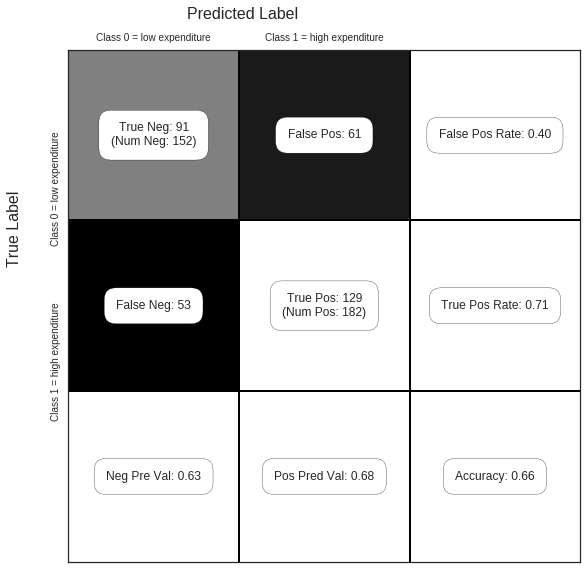

In [79]:
C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = low expenditure', 'Class 1 = high expenditure'])

# Confusion matrix
# http://localhost:8888/notebooks/lab_solutions/CART_logistic_evaluation_lab_SOLUTIONS.ipynb

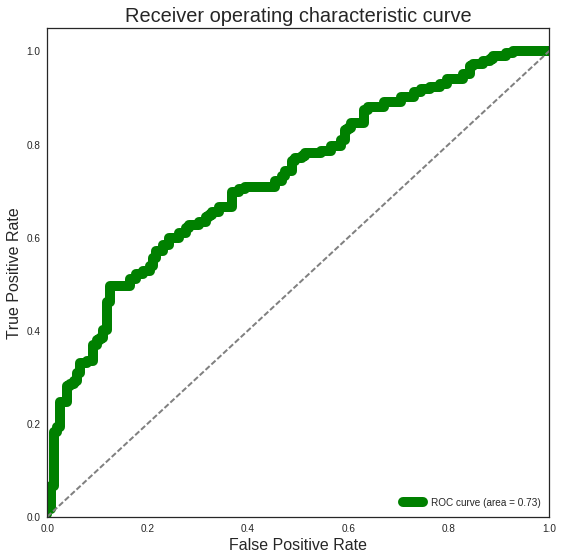

In [80]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# ROC curve

We can look at the performance of the logistical regression through the confusion matrix and the ROC curve.


We can see through the confusion matrix that there are still a lot of false positives and false negatives. The model could be doing better.

The ROC seem to do okay, but varies a lot. This is not a good sign, and we would also like the curve to be closer to a right angle than in this logistical regression.
THe ROC curve has an area of 0.73

# Predicting which class with a Decision Tree

Now, I look at the performance of predicitng with a desicion tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
gsdt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [82]:
gsdt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [83]:
dct_best = gsdt.best_estimator_
print "Best estimators on the left out data:\n", dct_best
print ''

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Best Params on hold out data (train):
{'max_features': None, 'min_samples_split': 2, 'max_depth': 10, 'min_samples_leaf': 1}


Best Score on left out data:0.794 




In [84]:
y_pred= gsdt.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['Low expenditure', 'High expenditure'],
                         columns=['Low expenditure', 'High expenditure'])

confusion

# Confusion matrix

,Low expenditure,High expenditure
Low expenditure,107,45
High expenditure,45,137


In [85]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.70      0.70      0.70       152
          1       0.75      0.75      0.75       182

avg / total       0.73      0.73      0.73       334



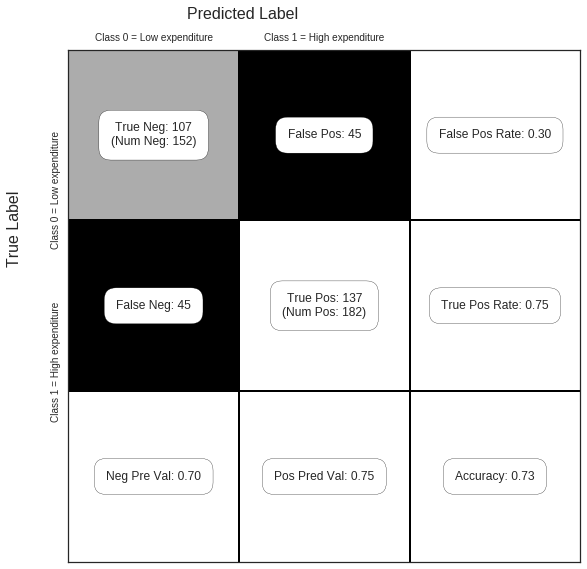

In [86]:
C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Low expenditure', 'Class 1 = High expenditure'])

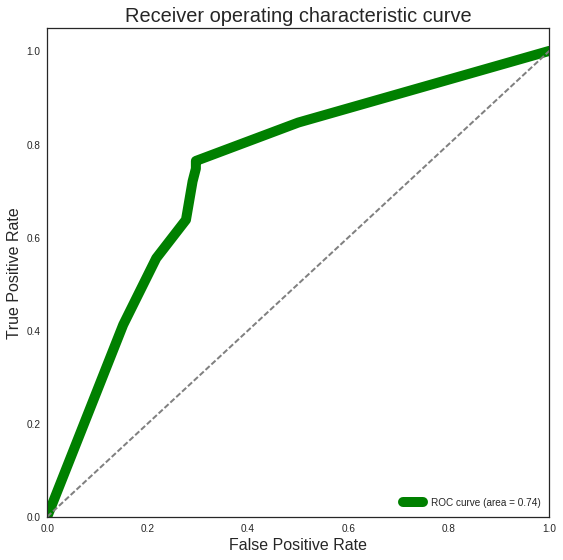

In [87]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# ROC curve

We can look at the performance of the desicion tree regression through the confusion matrix and the ROC curve.

We can see through the confusion matrix that there are less false positives and false negatives compared to the logistical regression. The model is thus performing better. 

The ROC curve is to be closer to a right angle, and varies a lot less than the logistical regression. This is a good sign, and the model is predicting slightly better with an area of 0.74


In [88]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

# defining a function to print feature importance using best models

In [89]:
feature_importance(X, dct_best)

# Mortality rate is the best predictor, with lchildren out of school in second and urban population third in importance

,feature,importance
18,"Mortality rate, infant (per 1,000 live births)...",0.121513
2,Children out of school (% of primary school ag...,0.108801
21,Urban population (% of total) [SP.URB.TOTL.IN.ZS],0.087867
12,GDP per capita (constant 2010 US$) [NY.GDP.PCA...,0.085809
26,"Unemployment, total (% of total labor force) (...",0.083809
7,"School enrollment, primary (gross), gender par...",0.061062
14,Trade (% of GDP) [NE.TRD.GNFS.ZS],0.055692
5,"Enrolment in primary education, both sexes (nu...",0.054511
1,"All education staff compensation, primary (% o...",0.043512
3,Duration of compulsory education (years) [SE.C...,0.038841


# Predicting which class with a Random Forest

Now, I will predict with a random forest.

In [90]:
from sklearn.ensemble import RandomForestClassifier

# from sklearn.ensemble import BaggingClassifier

In [91]:
# Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
#     'min_samples_leaf':np.linspace(0, 101, 20),
    'n_estimators':[100]
}

# gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [92]:
rf_gs.fit(X_train, y_train)

# Fit on the train data

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [93]:
rfc_best = rf_gs.best_estimator_
print "Best estimators on the left out data:\n", rfc_best
print ''

print "\nBest Params on hold out data (train):\n", rf_gs.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % rf_gs.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Best Params on hold out data (train):
{'max_features': 5, 'n_estimators': 100, 'max_depth': None}


Best Score on left out data:0.856 




In [94]:
y_pred= rfc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['Low expenditure', 'High expenditure'],
                         columns=['Low expenditure', 'High expenditure'])

confusion

# Confusion Matrix

,Low expenditure,High expenditure
Low expenditure,128,24
High expenditure,29,153


In [95]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.82      0.84      0.83       152
          1       0.86      0.84      0.85       182

avg / total       0.84      0.84      0.84       334



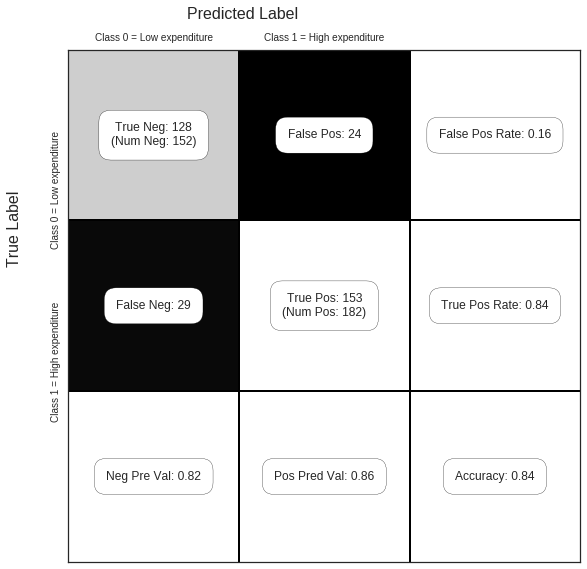

In [96]:
C = confusion_matrix(y_test, rf_gs.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Low expenditure', 'Class 1 = High expenditure'])

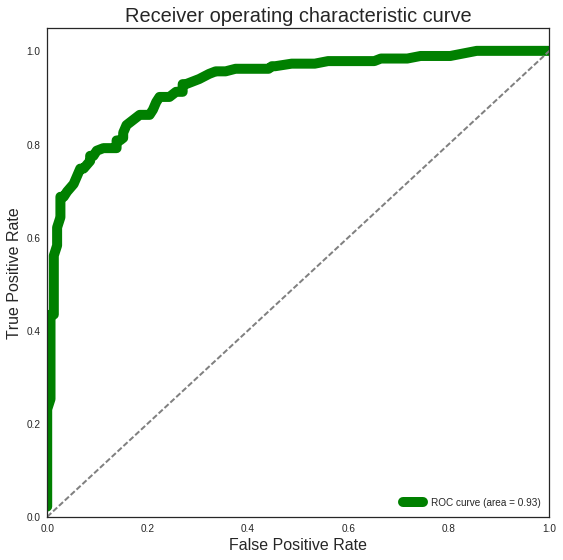

In [97]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = rf_gs.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# ROC curve

We can look at the performance of the random forest through the confusion matrix and the ROC curve.

We can see through the confusion matrix that there are about the same false positives and false negatives compared to the desicison tree. 

The ROC curve is closer to a right angle. This is a good sign, and the model is predicting better with an area of 0.93 compared to the 0.74 of the desicion tree. 
The model is thus performing better in predicting high or low expenditure on education.


In [98]:
feature_importance(X, rfc_best)

# GDP per capita is the most important predictor and the variables are similar to the desicion tree
# The importance of these variables are consistent with previous analysis

,feature,importance
12,GDP per capita (constant 2010 US$) [NY.GDP.PCA...,0.070041
18,"Mortality rate, infant (per 1,000 live births)...",0.060805
21,Urban population (% of total) [SP.URB.TOTL.IN.ZS],0.057537
5,"Enrolment in primary education, both sexes (nu...",0.056051
17,"Life expectancy at birth, total (years) [SP.DY...",0.055075
14,Trade (% of GDP) [NE.TRD.GNFS.ZS],0.054723
19,"Population, total [SP.POP.TOTL]",0.047750
2,Children out of school (% of primary school ag...,0.047511
10,"Adjusted net savings, including particulate em...",0.044559
15,"Birth rate, crude (per 1,000 people) [SP.DYN.C...",0.043450


# Predicting which class with a Bagging Classifier

Now let's look at the performance of a Bagging Classifier

In [99]:
from sklearn.ensemble import BaggingClassifier

In [100]:
bdt = BaggingClassifier(DecisionTreeClassifier())
params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }
    

gsbdt = GridSearchCV(bdt, params, cv=3, verbose=1, n_jobs=-1)

In [101]:
gsbdt.fit(X_train, y_train)

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done 25920 out of 25920 | elapsed: 30.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
        ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2, 5, 10, 20], 'max_samples': [0.5, 0.7, 1.0], 'base_estimator__min_samples_split': [2, 5, 7], 'base_estimator__max_depth': [3, 5, 10, 20], 'bootstrap_features': [False, True], 'max_features': [0.5, 0.7, 1.0], 'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10], 'base_estimator__max_features': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [102]:
bagc_best = gsbdt.best_estimator_
print "Best estimators on the left out data:\n", bagc_best
print ''

print "\nBest Params on hold out data (train):\n", gsbdt.best_params_
##Parameter setting that gave the best results on the hold out data.
print ''

print "\nBest Score on left out data:%.3f \n" % gsbdt.best_score_
## Score of best_estimator on the left out data.
print ''

Best estimators on the left out data:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=0.5,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


Best Params on hold out data (train):
{'max_samples': 1.0, 'base_estimator__min_samples_split': 5, 'base_estimator__max_depth': 20, 'base_estimator__max_features': None, 'n_estimators': 20, 'max_features': 0.5, 'base_estimator__min_samples_leaf': 1, 'bootstrap_features': True}


Best Score on left out data:0.833 




In [103]:
y_pred= bagc_best.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Low expenditure', 'True_Label_1 High expenditure'],
                         columns=['Predict_Label_0 Low expenditure', 'Predict_Label_1 High expenditure'])

confusion

,Predict_Label_0 Low expenditure,Predict_Label_1 High expenditure
True_Label_0 Low expenditure,124,28
True_Label_1 High expenditure,29,153


In [104]:
cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.81      0.82      0.81       152
          1       0.85      0.84      0.84       182

avg / total       0.83      0.83      0.83       334



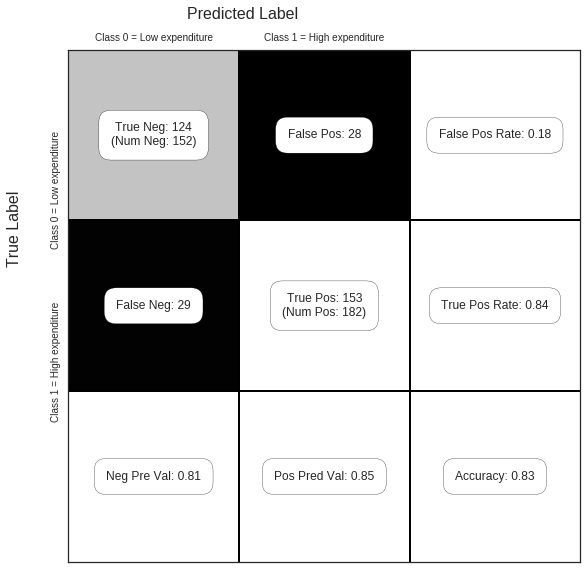

In [105]:
C = confusion_matrix(y_test, gsbdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Low expenditure', 'Class 1 = High expenditure'])

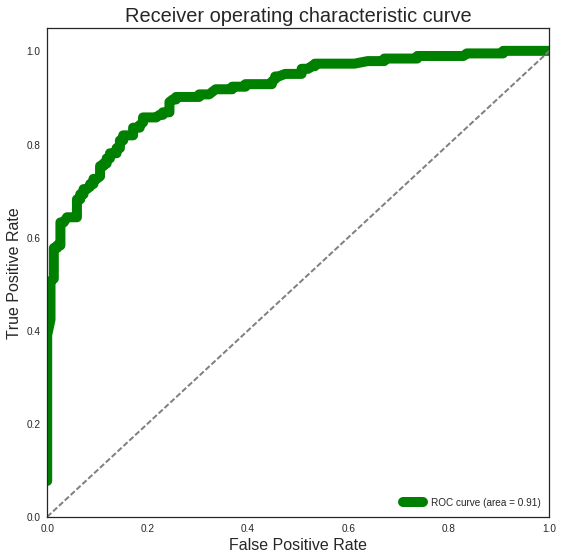

In [106]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsbdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

We can look at the performance of the bagging classifier through the confusion matrix and the ROC curve.

We can see through the confusion matrix that there are about the same false positives and false negatives compared to the random forest.

The ROC curve is close to a right angle. This is a good sign, but the model is predicting slightly worse than the random forest with an area of 0.91 compared to the 0.93. 
The random forest is thus still the best performing predicitve model


# Creating a PCA

Use PCA to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.


In [107]:
df.expenditure_education_dummy.value_counts()

# Looking at the number of observations for the dependent dummy variable 

1    621
0    491
Name: expenditure_education_dummy, dtype: int64

In [108]:
np.mean(df.expenditure_education_dummy)

# The mean

0.5584532374100719

In [109]:
columns_ = df.columns.tolist()
exclude_cols = ['Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]','Country Code','Time','Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]','expenditure_education_dummy']

df_cont = df[[i for i in columns_ if i not in exclude_cols]]

# Subset the df data to everything except the expenditure_education_dummy column and other selected variables

In [110]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_cont_n = ss.fit_transform(df_cont)
df_cont_n

# Standardize

array([[ -1.27523886e-01,   8.07154401e-15,  -3.75616924e-01, ...,
          0.00000000e+00,  -1.54594663e+00,  -3.98217372e-16],
       [  4.53198699e-01,   8.07154401e-15,  -4.56682316e-01, ...,
          0.00000000e+00,  -1.39070835e+00,  -3.98217372e-16],
       [  5.70925691e-01,   8.07154401e-15,   6.32009688e-01, ...,
          0.00000000e+00,  -9.08625284e-01,  -3.98217372e-16],
       ..., 
       [  1.08658847e+00,   4.70261782e-01,   9.26409326e-16, ...,
          0.00000000e+00,   0.00000000e+00,   3.73848428e+00],
       [  1.46699079e+00,   8.07154401e-15,  -6.57959584e-01, ...,
          0.00000000e+00,   0.00000000e+00,   3.62639606e+00],
       [  1.62664234e+00,   8.07154401e-15,  -4.00401727e-01, ...,
          0.00000000e+00,   0.00000000e+00,   2.41331771e-01]])

In [111]:
from sklearn.decomposition import PCA
df_pca = PCA().fit(df_cont_n)
print "Number of PCA components is: \n", df_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", df_pca.components_

# Fit the PCA and print the components

Number of PCA components is: 
27


List of PCA components is:
[[ -2.42190959e-01   2.06256066e-02   3.12156361e-01  -1.33856347e-01
   -1.41239556e-01   3.63114345e-02  -3.20919213e-01  -2.67197900e-01
    6.35134565e-03  -2.42020888e-01  -1.29727396e-01  -5.46369890e-02
   -2.22585774e-01  -6.11898762e-02  -7.81661013e-02   3.34045906e-01
    1.13649526e-01  -3.42697280e-01   3.61352625e-01   2.32691337e-02
   -7.78959459e-02  -2.84481925e-01  -5.35865201e-02  -3.56855422e-02
    1.37065010e-01  -9.53039210e-02   2.59803044e-03]
 [ -2.40507309e-02   6.57681082e-03   1.38092512e-02  -3.94698367e-04
    5.82503877e-03   3.95483490e-01  -1.15899692e-02  -1.51344204e-02
    4.22952898e-01  -2.48917890e-02   3.49200147e-02   4.14309851e-01
    1.69783162e-02   3.96877878e-01  -1.00087023e-01  -2.36333614e-03
   -8.46137217e-03   2.18424758e-03   3.34798416e-02   4.12169000e-01
   -3.53304819e-02  -1.33101053e-02   3.74787384e-01   7.40848633e-02
   -1.72734224e-03  -4.62820104e-02  -3.9670

In [112]:
df_pcs = df_pca.transform(df_cont_n)
df_pcs

# transform  => Apply dimensionality reduction to X.

array([[  1.48521077e+00,   2.53762594e-01,  -1.77165084e+00, ...,
         -3.69022357e-01,   7.08915584e-02,  -1.18336889e-01],
       [  2.97365840e-01,  -2.56599870e-03,  -1.14514418e+00, ...,
         -5.12685977e-02,   2.25842306e-02,  -3.67932902e-02],
       [  3.67933791e-02,  -5.13755608e-01,  -1.02637001e+00, ...,
          4.12375472e-02,   9.96036849e-02,   1.74791753e-02],
       ..., 
       [  7.60744865e-01,  -3.34153385e-01,  -2.11525720e+00, ...,
          2.48806485e-01,  -1.33395064e-01,  -1.77135852e-02],
       [ -2.91583489e+00,  -1.98993144e-01,  -1.08382813e+00, ...,
         -1.42338826e-01,   8.55061879e-02,  -1.64316292e-02],
       [ -1.92906309e+00,  -6.09162507e-01,  -1.20407778e+00, ...,
          1.73114129e-01,   1.92934399e-03,   2.41848293e-02]])

In [113]:
df_pcs = pd.DataFrame(df_pcs, columns=['PC'+str(i) for i in range(1, df_pcs.shape[1]+1)])
df_pcs['expenditure_education_dummy'] = df.expenditure_education_dummy.values

# Now create the dataframe for pcs
# Need to add .values to the dummy to create the dataframe correctly
# http://stackoverflow.com/questions/26221300/nan-values-when-new-column-added-to-pandas-dataframe

In [114]:
df.shape

# Checking the shape of the original dataframe

(1112, 32)

In [115]:
df_pcs.shape

# Checking the shape of the pcs dataframe

(1112, 28)

In [116]:
df_pcs.isnull().sum(axis=0)

# No missing values, dataframe was created correctly

PC1                            0
PC2                            0
PC3                            0
PC4                            0
PC5                            0
PC6                            0
PC7                            0
PC8                            0
PC9                            0
PC10                           0
PC11                           0
PC12                           0
PC13                           0
PC14                           0
PC15                           0
PC16                           0
PC17                           0
PC18                           0
PC19                           0
PC20                           0
PC21                           0
PC22                           0
PC23                           0
PC24                           0
PC25                           0
PC26                           0
PC27                           0
expenditure_education_dummy    0
dtype: int64

In [117]:
df_pcs.head(5)

# First five observations of the pcs dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,expenditure_education_dummy
0,1.485211,0.253763,-1.771651,-0.606193,0.135381,-0.258794,-0.091425,0.043712,-0.763239,-0.268640,...,-1.096182,-0.370304,-0.173525,0.679755,0.315588,0.339423,-0.369022,0.070892,-0.118337,1
1,0.297366,-0.002566,-1.145144,-1.063177,-0.975917,-0.267533,0.518593,-0.341418,-0.685297,-0.703973,...,-0.086374,0.312317,-0.124708,0.021565,0.024329,0.223628,-0.051269,0.022584,-0.036793,0
2,0.036793,-0.513756,-1.026370,-0.920849,0.482319,0.375016,-0.385579,-0.506879,0.172334,-0.420483,...,0.242004,-0.205183,-0.081169,-0.228498,-0.004213,0.207214,0.041238,0.099604,0.017479,1
3,0.685107,-0.248325,-2.053060,-0.503485,-0.339330,-0.067587,0.302467,-0.457660,-0.530060,-0.575747,...,-0.603655,0.209169,-0.116687,-0.170029,-0.217756,0.111759,0.185428,-0.026920,0.002498,1
4,1.436991,-0.065845,-0.552984,-0.944649,-0.668280,-0.646062,0.225138,-0.009655,-0.585441,-0.331398,...,-0.514940,-0.405704,-0.134849,0.495243,0.293340,0.167463,-0.228252,-0.008467,-0.002162,1


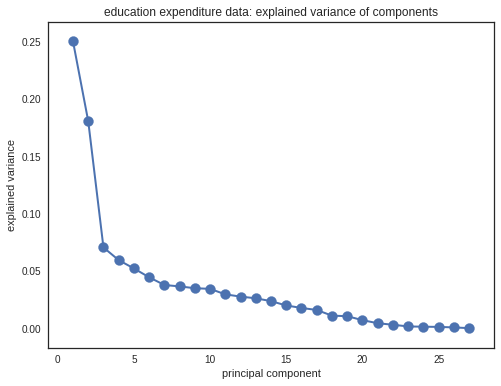

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, df_cont.shape[1]+1), df_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, df_cont.shape[1]+1), df_pca.explained_variance_ratio_, s=100)
ax.set_title('education expenditure data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

# Looking at the explained variance of the components

In [119]:
for col, comp in zip(df_cont.columns, df_pca.components_[3]):
    print col, comp
    
# Print out the component weights with their corresponding variables for PC1, PC2, and PC3

Adult literacy rate, population 15+ years, both sexes (%) [SE.ADT.LITR.ZS] 0.151530139658
All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS] -0.0893854210313
Children out of school (% of primary school age) [SE.PRM.UNER.ZS] 0.0885452472485
Duration of compulsory education (years) [SE.COM.DURS] -0.1291365787
Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS] 0.360724706716
Enrolment in primary education, both sexes (number) [SE.PRM.ENRL] -0.100716802021
Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS] -0.0539912267303
School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS] 0.000892853840897
Teachers in secondary education, both sexes (number) [SE.SEC.TCHR] -0.0456047867403
Youth literacy rate, population 15-24 years, both sexes (%) [SE.ADT.1524.LT.ZS] 0.10548228766
Adjusted net savings, including particulate

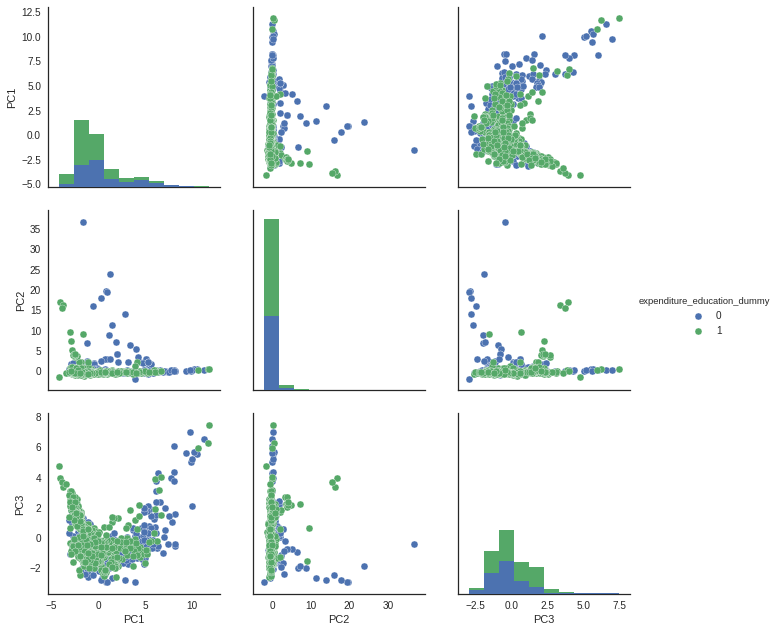

In [120]:
sns.pairplot(data=df_pcs, vars=['PC1','PC2','PC3'], hue='expenditure_education_dummy', size=3)
plt.show()

# Plot a seaborn pairplot of PC1, PC2, and PC3 
# Looks like a plot with 6 components is better after using horns paralell analysis

In [121]:
df_cont.shape

# Checking shape of the dataframe

(1112, 27)

In [122]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

# Write a function to perform parallel analysis

In [123]:
df_pa = horn_parallel_analysis(df_cont.shape, percentile=95)
df_pa

array([ 1.35149513,  1.29894117,  1.26210541,  1.23002373,  1.20284097,
        1.1766558 ,  1.15341212,  1.13127079,  1.10926152,  1.08806124,
        1.06996027,  1.04838383,  1.02801606,  1.01116489,  0.9946218 ,
        0.97497275,  0.95722293,  0.93975993,  0.92252773,  0.90408835,
        0.88573972,  0.86676238,  0.8474526 ,  0.82970436,  0.80877385,
        0.78622349,  0.75923874])

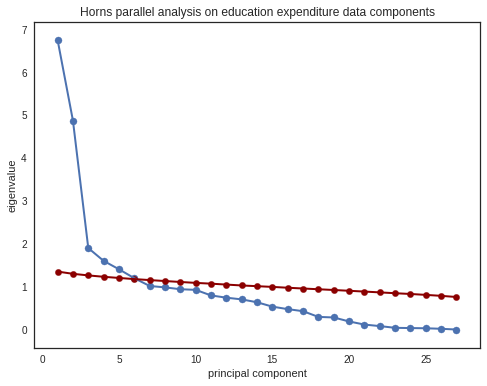

In [124]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, df_cont.shape[1]+1), df_pca.explained_variance_, lw=2)
ax.scatter(range(1, df_cont.shape[1]+1), df_pca.explained_variance_, s=50)

ax.plot(range(1, len(df_pa)+1), df_pa, lw=2, color='darkred')
ax.scatter(range(1, len(df_pa)+1), df_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on education expenditure data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

# Plot the df eigenvalues (.variance_explained_) against the parallel analysis random eigenvalue cutoffs
# 6 components are not noise according to the chart

# Perform stratified cross-validation on a KNN classifier and logisitic regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

# Importin packages

In [126]:
columns_ = df.columns.tolist()
exclude_cols = ['Adults (ages 15+) and children (ages 0-14) newly infected with HIV [SH.HIV.INCD.TL]','Country Code','Time','Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]','expenditure_education_dummy']
y = df.expenditure_education_dummy.values
X = df[[i for i in columns_ if i not in exclude_cols]]
X = X.values

# Define my x and y

In [127]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn_gs = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs.fit(X, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

# Gridsearch the best KNN parameters.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_neighbors': 7, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.6s finished


In [128]:
cv_indices = StratifiedKFold(y, n_folds=5)
## StratifiedKFold = Provides train/test indices to split data in train/test sets.
## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

logreg = LogisticRegression()

lr_scores_test = []
lr_scores_train = []

knn_scores_test = []
knn_scores_train = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = X[train_inds, :], y[train_inds]
    Xte, yte = X[test_inds, :], y[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr.shape, ytr.shape
    print 'Xtest and ytest shapes:\n', Xte.shape, yte.shape

    
    best_knn.fit(Xtr, ytr)
    knn_scores_test.append(best_knn.score(Xte, yte))
    knn_scores_train.append(best_knn.score(Xtr, ytr))
    '''best_knn.score = Returns the mean accuracy on the given test data and labels'''
    y_knn_predict  = best_knn.predict(Xte)
    
    
    logreg.fit(Xtr, ytr)
    lr_scores_test.append(logreg.score(Xte, yte))
    lr_scores_train.append(logreg.score(Xtr, ytr))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict = logreg.predict(Xte)
    
    
print "\n======\n"
print 'KNN accuracy scores on test:\n', knn_scores_test
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test)
print 'KNN mean of accuracy scores on train :\n', np.mean(knn_scores_train)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train)

print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(y)

Xtrain and ytrain shapes:
(888, 27) (888,)
Xtest and ytest shapes:
(224, 27) (224,)
Xtrain and ytrain shapes:
(890, 27) (890,)
Xtest and ytest shapes:
(222, 27) (222,)
Xtrain and ytrain shapes:
(890, 27) (890,)
Xtest and ytest shapes:
(222, 27) (222,)
Xtrain and ytrain shapes:
(890, 27) (890,)
Xtest and ytest shapes:
(222, 27) (222,)
Xtrain and ytrain shapes:
(890, 27) (890,)
Xtest and ytest shapes:
(222, 27) (222,)


KNN accuracy scores on test:
[0.6205357142857143, 0.70270270270270274, 0.72072072072072069, 0.72522522522522526, 0.62612612612612617]
KNN mean of accuracy scores on test:
0.679062097812
KNN mean of accuracy scores on train :
0.777652090293


Logistic Regression accuracy scores on test:
[0.6294642857142857, 0.64864864864864868, 0.5495495495495496, 0.62612612612612617, 0.5855855855855856]
Logistic Regression mean of accuracy scores on test:
0.607874839125
Logistic Regression mean of accuracy scores on train:
0.606560886729


Baseline accuracy:
  0.55845323741


The KNN seem to performing better than the logistic regression with a higher accuracy score

In [129]:
df_pcs.head(3).T

# Browsing through the variables in the pcs dataframe

,0,1,2
PC1,1.485211,0.297366,0.036793
PC2,0.253763,-0.002566,-0.513756
PC3,-1.771651,-1.145144,-1.026370
PC4,-0.606193,-1.063177,-0.920849
PC5,0.135381,-0.975917,0.482319
PC6,-0.258794,-0.267533,0.375016
PC7,-0.091425,0.518593,-0.385579
PC8,0.043712,-0.341418,-0.506879
PC9,-0.763239,-0.685297,0.172334
PC10,-0.268640,-0.703973,-0.420483


In [130]:
## Define my x and y
## For your X = only use the number of PCA's that have the greatest explanatory power

columns_ = df_pcs.columns.tolist()
exclude_cols = ['expenditure_education_dummy', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14', 'PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23', 'PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33']

ypc = df_pcs.expenditure_education_dummy.values

Xpc = df_pcs[[i for i in columns_ if i not in exclude_cols]]
Xpc = Xpc.values

# Looks like I need 6 components from horns parallell analyis, I'm therefore excluding the other PCA's

## Perform stratified cross-validation on a KNN classifier and logisitic regression

In [131]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn_gs_pc = GridSearchCV(knn, params, cv=5, verbose=1)
knn_gs_pc.fit(Xpc, ypc)

print knn_gs_pc.best_params_
best_knn_pc = knn_gs_pc.best_estimator_

# Gridsearch the best KNN parameters.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_neighbors': 1, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.2s finished


In [132]:
cv_indices_pc = StratifiedKFold(ypc, n_folds=5)

logreg_pc = LogisticRegression()

lr_scores_test_pc = []
lr_scores_train_pc = []

knn_scores_test_pc = []
knn_scores_train_pc = []

for train_inds, test_inds in cv_indices_pc:
    
    Xtr_pc, ytr_pc = Xpc[train_inds, :], ypc[train_inds]
    Xte_pc, yte_pc = Xpc[test_inds, :], ypc[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr_pc.shape, ytr_pc.shape
    print 'Xtest and ytest shapes:\n', Xte_pc.shape, yte_pc.shape

    
    best_knn_pc.fit(Xtr_pc, ytr_pc)
    knn_scores_test_pc.append(best_knn_pc.score(Xte_pc, yte_pc))
    knn_scores_train_pc.append(best_knn_pc.score(Xtr_pc, ytr_pc))
    '''best_knn.score = Returns the mean accuracy on the given test data and labels'''
    y_knn_predict_pc  = best_knn_pc.predict(Xte_pc)

    
    
    logreg_pc.fit(Xtr_pc, ytr_pc)
    lr_scores_test_pc.append(logreg_pc.score(Xte_pc, yte_pc))
    lr_scores_train_pc.append(logreg_pc.score(Xtr_pc, ytr_pc))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict_pc = logreg_pc.predict(Xte_pc)
    
print "\n======\n"
print 'KNN accuracy scores on test:\n', knn_scores_test_pc
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test_pc)
print 'KNN mean of accuracy scores on train :\n', np.mean(knn_scores_train_pc)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test_pc
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test_pc)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train_pc)

print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(ypc)

Xtrain and ytrain shapes:
(888, 6) (888,)
Xtest and ytest shapes:
(224, 6) (224,)
Xtrain and ytrain shapes:
(890, 6) (890,)
Xtest and ytest shapes:
(222, 6) (222,)
Xtrain and ytrain shapes:
(890, 6) (890,)
Xtest and ytest shapes:
(222, 6) (222,)
Xtrain and ytrain shapes:
(890, 6) (890,)
Xtest and ytest shapes:
(222, 6) (222,)
Xtrain and ytrain shapes:
(890, 6) (890,)
Xtest and ytest shapes:
(222, 6) (222,)


KNN accuracy scores on test:
[0.7008928571428571, 0.77927927927927931, 0.75225225225225223, 0.80180180180180183, 0.72972972972972971]
KNN mean of accuracy scores on test:
0.752791184041
KNN mean of accuracy scores on train :
1.0


Logistic Regression accuracy scores on test:
[0.5803571428571429, 0.59459459459459463, 0.59909909909909909, 0.63963963963963966, 0.63063063063063063]
Logistic Regression mean of accuracy scores on test:
0.608864221364
Logistic Regression mean of accuracy scores on train:
0.622983095455


Baseline accuracy:
  0.55845323741


In [133]:
'''the mean of the accuracy score on the test data has a significant increase from '''
print 'KNN mean of accuracy scores on test:\n', np.mean(knn_scores_test)
print 'KNN mean of accuracy scores on test PC:\n', np.mean(knn_scores_test_pc)
print "Increase of accuracy of:", (np.mean(knn_scores_test_pc) - np.mean(knn_scores_test))

KNN mean of accuracy scores on test:
0.679062097812
KNN mean of accuracy scores on test PC:
0.752791184041
Increase of accuracy of: 0.0737290862291


There is an increase of accuracy of 7%

## Look at the confusion Matrix for each of my classification methods

In [134]:
def confus_mat(ytrue, ypred_method, what_predict):
    what_predict = str(what_predict)
    confmat = confusion_matrix(y_true=ytrue, y_pred=ypred_method)
    confusion = pd.DataFrame(confmat, index=['is_not_' + what_predict, 'is_' + what_predict],
                         columns=['predicted_is_not_'+ what_predict, 'predicted_is_'+what_predict])
    return confusion

In [135]:
def class_report(ytrue, ypred):
    cls_rep = classification_report(yte, y_knn_predict)
    print cls_rep

In [136]:
confus_mat(yte, y_knn_predict, 'expenditure_education_dummy')

# Confuion Matrix for knn

,predicted_is_not_expenditure_education_dummy,predicted_is_expenditure_education_dummy
is_not_expenditure_education_dummy,53,45
is_expenditure_education_dummy,38,86


In [137]:
class_report(yte, y_knn_predict)

# Classification report for knn

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        98
          1       0.66      0.69      0.67       124

avg / total       0.62      0.63      0.62       222



In [138]:
confus_mat(yte, y_log_predict, 'expenditure_education_dummy')

# Confusion Matrix for logistic

,predicted_is_not_expenditure_education_dummy,predicted_is_expenditure_education_dummy
is_not_expenditure_education_dummy,62,36
is_expenditure_education_dummy,56,68


In [139]:
class_report(yte, y_log_predict)

# Classification report for logistic

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        98
          1       0.66      0.69      0.67       124

avg / total       0.62      0.63      0.62       222



In [140]:
class_report(yte, y_knn_predict_pc)

# Classification report for knn with PC

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        98
          1       0.66      0.69      0.67       124

avg / total       0.62      0.63      0.62       222



In [141]:
class_report(yte, y_log_predict_pc)

# Classification report for logistical with PC

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        98
          1       0.66      0.69      0.67       124

avg / total       0.62      0.63      0.62       222



Each of the columns indicate an important metric for evaluating classification model performance.
We want the precision, recall and f1-score to be close to one. The models here are performing equally well in this regard, but with lower precision, recall and f1-score compared to the random forest.
The random forest is therefore the best model to predict which class (high or low education expenditure).

# Technical Conclusion

How much does a country spend on education as a percentage of their GDP? This question is explored through multiple models in looking at education expenditure as a continous variable and as a dummy for high or low expenditure on education. I merged different dataframes from the World bank to answer this question. This data is often used in development today and it's therefore essential to gain a better understanding of the data. I focus on the education dataset as my main dataset. 

By running several different models I find the Random forest to be the best performing model on the contionus variable: education expenditure as a percentage of GDP. 
The model has a high R^2 and a low MSE and is not overfitting. 
The R^2 is 0.45 for the train data and the test data has a R² of 0.32. We can also see that the MSE is 0.96 for the train data and 1.26 for the test data. This is the best performing model without overfitting. 

I find similarly the random forest to be the best performing model on predicting the dummy variable. The dummy takes the value of zero if the percentage of GDP expenditure on education is less than the mean. It takes the value of one if it's equal to or above the mean.
We can look at the performance of the random forest through the confusion matrix and the ROC curve.
We can see through the confusion matrix that there are lower false positives and false negatives compared to the other models.
The ROC curve is closer to a right angle. This is a good sign, and the model is predicting better with an area of 0.93. The model is thus performing better than the others in predicting high or low expenditure on education.

The strength of my approach is the balance of performance on the train and test data in the random forest, and that I explore many different potential models. I have consistent findings throughout multiple models

The weakness of my approach is the selection of variables to analyze. The selection is somewhat arbitrary and can can therefore be done in a more robust way. A smaller number of indicators was selected to have a more managable task for my computer.
The many missing values forced me to drop many observations, which is a weakness since these were probably the observations with the lowest expenditure on education. The replacement of the mean for the remaining missing values is another assumption in that it might not be correct for all variables/observations.

Future research should thus look for data with less missing values or explore different approaches in dealing with them and increase the number of indicators. 



# Non-Technical Conclusion

How much does a country spend on education as a percentage of their GDP? This question is explored through multiple models in looking at education expenditure. I also predict if a country has high or low expenditure on education by using machine learning. I use data from the world bank that is often used in development today. 

By running several different models I find the Random forest to be the best performing model on education expenditure as a percentage of GDP. Mortality rate is the most important variable with enrolment in primary and total population is now second and third. Decreasing mortality rates will thus likely increase the likelihood of higher expenditures on education in developing countries. Same can be said interestingly for central government debt, and reducing this debt can be a way for developed countries to help developing countries increase their expenditures on education. Applying this model gives an increased understanding of what indicators are explaining education expenditure.

I find the random forest model to be the best performing model on predicting if a country has high or low expenditures on education. The model is performing better than the others in predicting high or low expenditure on education through both of these. 
GDP per capita is the most important variable in predicting, followed by enrolment in primary education, total population and martality rate. We can therefore do a good job in determine the expenditure level on education using world bank indicators.

The strength of my approach is the balance of performance in the random forest, and that I explore many different potential models. I have consistent findings throughout multiple models

The weakness of my approach is the selection of variables to analyze. The selection is somewhat arbitrary and can can therefore be done in a more different way. A smaller number of indicators was selected to have a more managable task for my computer. 
The many missing values forced me to drop many observations, which is a weakness since these were probably the observations with the lowest expenditure on education. The replacement of the mean for the remaining missing values is another weakness in that it might not be correct for all variables/observations.

Future research should thus look for data with less missing values or explore different approaches in dealing with them and increase the number of indicators. 